Given that we do not appear to have access to the Minerva sims, I'm going to compute covariances from the test boxes. I'm gonna start by computing a separate one for each HOD and Cosmology used, across realizations, and convince myself they don't vary much. 

In [31]:
from pearce.mocks.kittens import TestBox
from pearce.mocks import tpcf_subregions
import numpy as np
from collections import OrderedDict
from time import time
from scipy.optimize import minimize_scalar

In [32]:
import matplotlib
#matplotlib.use('Agg')
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [33]:
nd = 1e-4
min_ptcl = 100
r_bins = np.logspace(-0.4, 1.6, 11)
logMmin_bounds = (12.0, 14.0)

In [34]:
r_bins

array([  0.39810717,   0.63095734,   1.        ,   1.58489319,
         2.51188643,   3.98107171,   6.30957344,  10.        ,
        15.84893192,  25.11886432,  39.81071706])

In [35]:
hod_param_ranges =  OrderedDict({'sigma_logM': [0.05, 0.3], 'logM0': [13.1, 14.6], 'logM1': [13.1, 14.6], 'alpha': [0.8, 1.2]})

In [36]:
def make_LHC(ordered_params, N, seed = None):

    if seed is None:
        seed = int(time())
    np.random.seed(seed)

    points = []
    # by linspacing each parameter and shuffling, I ensure there is only one point in each row, in each dimension.
    for plow, phigh in ordered_params.itervalues():
        point = np.linspace(plow, phigh, num=N)
        np.random.shuffle(point)  # makes the cube random.
        points.append(point)
    return np.stack(points).T

In [37]:
def add_logMmin(hod_params, cat):

    hod_params['logMmin'] = 13.0 #initial guess
    #cat.populate(hod_params) #may be overkill, but will ensure params are written everywhere
    def func(logMmin, hod_params):
        hod_params.update({'logMmin':logMmin}) 
        return (cat.calc_analytic_nd(hod_params) - nd)**2

    #res = minimize_scalar(func, bounds = logMmin_bounds, args = (hod_params,), options = {'maxiter':100}, method = 'Bounded')

    # assuming this doens't fail
    #print 'logMmin', res.x
    hod_params['logMmin'] = 15.0#res.x

In [38]:
N = 10
LHC = make_LHC(hod_param_ranges, N)
hod_dicts = [dict(zip(hod_param_ranges.keys(), vals)) for vals in LHC]

In [39]:
from scipy.linalg import block_diag

In [40]:
-

In [6]:
out = [range(i) for i in xrange(4)]
import numpy as np
print np.hstack(out)
print out

[ 0.  0.  1.  0.  1.  2.]
[[], [0], [0, 1], [0, 1, 2]]


In [42]:
cov_mats = np.zeros((7,N, 5, 2*len(r_bins)-2, 2*len(r_bins)-2))

for boxno in xrange(7):
    for realization in xrange(5):
        cat = TestBox(boxno = boxno, realization = realization, system = 'sherlock')
        cat.load(1.0, HOD = str('zheng07'), particles = True, downsample_factor = 1e-2)
        for hod_idx, hod_params in enumerate(hod_dicts):
            add_logMmin(hod_params, cat)
            print hod_params

            cat.populate(hod_params)
            mat =  compute_full_jk(cat, r_bins)
            break
        break
    break

{'logM0': 14.266666666666666, 'sigma_logM': 0.16111111111111109, 'logM1': 13.266666666666666, 'logMmin': 15.0, 'alpha': 0.88888888888888895}


/home/users/swmclau2/.local/lib/python2.7/site-packages/pearce/mocks/cat.py:284: UserWarning: n_cores invalid. Changing from 100 to maximum 16.
  warnings.warn('n_cores invalid. Changing from %d to maximum %d.' % (n_cores, max_cores))


True True
45688 456880
[ 0.39810717  0.63095734] [ 1660.55949785  1660.55949785  1660.55949785] 16
True True

A
B
C
(27, 1)
[[ 80307.03467913]
 [ 87574.49373991]
 [ 80152.7864895 ]
 [ 79432.8560821 ]
 [ 93104.60567729]
 [ 80649.13922977]
 [ 74764.79373644]
 [ 74638.03740602]
 [ 74959.67096925]
 [ 80367.46370381]
 [ 74328.08542864]
 [ 74509.90219362]
 [ 80949.30825906]
 [ 75046.29755305]
 [ 75199.62617734]
 [ 75567.75156179]
 [ 75117.51993911]
 [ 75113.81871287]
 [ 86948.19024289]
 [ 75006.41648796]
 [ 74977.72228714]
 [ 75472.99314119]
 [ 75266.15865228]
 [ 75010.16231616]
 [ 80681.96755157]
 [ 80929.11224539]
 [ 75646.71477444]]

True True
45688 228440
[  0.63095734   1.           1.58489319   2.51188643   3.98107171
   6.30957344  10.          15.84893192  25.11886432  39.81071706] [ 1660.55949785  1660.55949785  1660.55949785] 16
True True

A
B
C
(27, 9)
[[  2.73638103e+04   1.90450064e+04   6.90339277e+03   1.65587586e+03
    1.32019487e+02   2.07884262e+01   8.72280610e+00   3.327

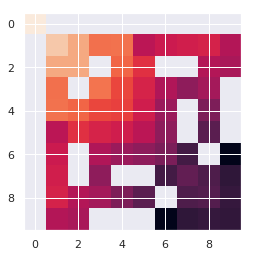

In [44]:
plt.imshow(np.log10(mat) )